In [23]:
# Save this as 'test_mindspore.py'
import mindspore as ms
from mindspore import Tensor, ops
import mindspore.dataset as ds
import numpy as np

print("1. Testing Tensors...")
x = Tensor([1.0, 2.0, 3.0], ms.float32)
print(f"   Created Tensor: {x}")
print(f"   Using ops: {ops.add(x, x)}")

print("\n2. Testing Dataset Loading (Custom Example)...")
# Simulate a small custom dataset
features = np.array([[1.0], [2.0], [3.0]], dtype=np.float32)
labels = np.array([[2.0], [4.0], [6.0]], dtype=np.float32) # Simple y = 2*x relationship

class SimpleDataset:
    def __init__(self, data, target):
        self.data = data
        self.target = target
    def __getitem__(self, index):
        return self.data[index], self.target[index]
    def __len__(self):
        return len(self.data)

loader = SimpleDataset(features, labels)
dataset = ds.GeneratorDataset(source=loader, column_names=["feature", "label"])
dataset = dataset.batch(batch_size=2)

for batch in dataset.create_dict_iterator():
    print(f"   Batch - Features: {batch['feature']}, Labels: {batch['label']}")

print("\n3. MindSpore Version & Device Check...")
print(f"   MindSpore Version: {ms.__version__}")
ms.set_context(device_target="CPU")
print("   ✅ MindSpore is ready on CPU!")

[WARNING] ME(32720:26456,MainProcess):2026-02-09-17:29:56.592.000 [mindspore\context.py:1334] For 'context.set_context', the parameter 'device_target' will be deprecated and removed in a future version. Please use the api mindspore.set_device() instead.


1. Testing Tensors...
   Created Tensor: [1. 2. 3.]
   Using ops: [2. 4. 6.]

2. Testing Dataset Loading (Custom Example)...
   Batch - Features: [[1.]
 [2.]], Labels: [[2.]
 [4.]]
   Batch - Features: [[3.]], Labels: [[6.]]

3. MindSpore Version & Device Check...
   MindSpore Version: 2.7.1
   ✅ MindSpore is ready on CPU!


In [24]:
%pip install matplotlib

Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: matplotlib in c:\users\user\appdata\local\programs\python\python310\lib\site-packages (3.10.8)




[notice] A new release of pip is available: 23.0.1 -> 26.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


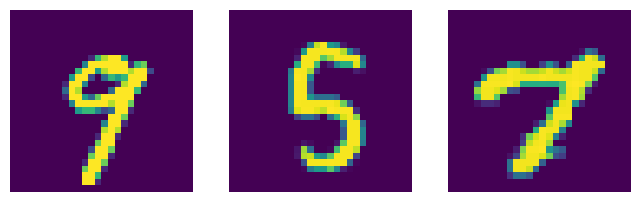

In [25]:
import os
import mindspore.dataset as ds
import matplotlib.pyplot as plt

dataset_dir = "C:\\Users\\user\\Huawei Competition\\MNIST\\train"  # Update this to your dataset path
mnist_dataset = ds.MnistDataset(dataset_dir, num_samples=3)

# Visualize the first 3 samples
plt.figure(figsize=(8, 8))
i=1

for dic in mnist_dataset.create_dict_iterator(output_numpy=True):
    plt.subplot(1, 3, i)
    plt.imshow(dic['image'][:, :, 0])
    plt.axis('off')
    i += 1
plt.show()


In [26]:
import numpy as np
np.random.seed(0)

class DatasetGenerator:
    def __init__(self):
        self.data= np.random.sample((5,2))
        self.labels = np.random.sample((5,1))

    def __getitem__(self, index):
        return self.data[index], self.labels[index]

    def __len__(self):
        return len(self.data)
    
dataset_generator = DatasetGenerator()
dataset = ds.GeneratorDataset(source=dataset_generator, column_names=["data", "labels"], shuffle=False)
for batch in dataset.create_dict_iterator():
    print(f"Data: {batch['data']}, Labels: {batch['labels']}")

Data: [0.5488135  0.71518937], Labels: [0.79172504]
Data: [0.60276338 0.54488318], Labels: [0.52889492]
Data: [0.4236548  0.64589411], Labels: [0.56804456]
Data: [0.43758721 0.891773  ], Labels: [0.92559664]
Data: [0.96366276 0.38344152], Labels: [0.07103606]


## Perform data augmentation

In [27]:
ds.config.set_seed(58)
dataset = dataset.shuffle(buffer_size=10)
dataset = dataset.batch(batch_size=2)

for batch in dataset.create_dict_iterator():
    print(f"Shuffled Batch - Data: {batch['data']}, Labels: {batch['labels']}")
    
    

Shuffled Batch - Data: [[0.5488135  0.71518937]
 [0.4236548  0.64589411]], Labels: [[0.79172504]
 [0.56804456]]
Shuffled Batch - Data: [[0.43758721 0.891773  ]
 [0.60276338 0.54488318]], Labels: [[0.92559664]
 [0.52889492]]
Shuffled Batch - Data: [[0.96366276 0.38344152]], Labels: [[0.07103606]]


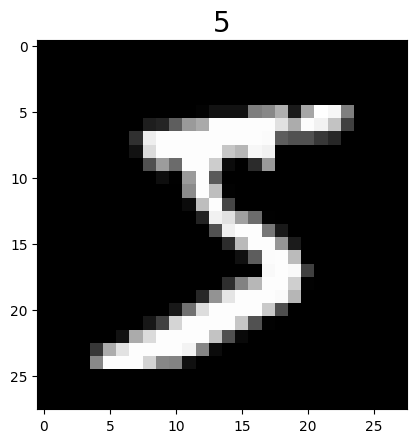

In [28]:
import matplotlib.pyplot as plt
from mindspore.dataset.vision import Inter
import mindspore.dataset.vision.c_transforms as c_vision

dataset_dir = "C:\\Users\\user\\Huawei Competition\\MNIST\\train"  # Update this to your dataset path
mnist_dataset = ds.MnistDataset(dataset_dir, num_samples=6, shuffle=False)
mnist_it= mnist_dataset.create_dict_iterator()
data = next(mnist_it)
plt.imshow(data['image'].asnumpy().squeeze(), cmap= plt.cm.gray)
plt.title(data['label'].asnumpy(), fontsize=20)
plt.show()


[WARNING] ME(32720:26456,MainProcess):2026-02-09-17:30:03.668.000 [mindspore\dataset\core\validator_helpers.py:744] 'Resize' from mindspore.dataset.vision.c_transforms is deprecated from version 1.8 and will be removed in a future version. Use 'Resize' from mindspore.dataset.vision instead.
[WARNING] ME(32720:26456,MainProcess):2026-02-09-17:30:03.670.000 [mindspore\dataset\core\validator_helpers.py:744] 'RandomCrop' from mindspore.dataset.vision.c_transforms is deprecated from version 1.8 and will be removed in a future version. Use 'RandomCrop' from mindspore.dataset.vision instead.


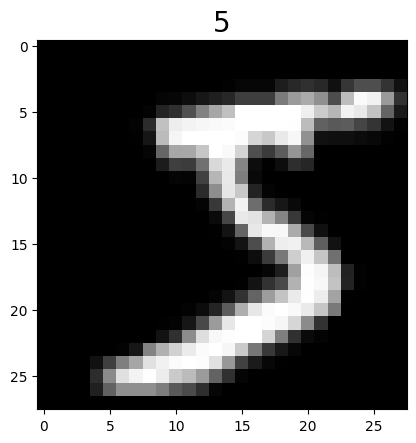

In [29]:
resize_op = c_vision.Resize((32, 32), interpolation=Inter.LINEAR)
crop_op = c_vision.RandomCrop(28)
transforms_list = [resize_op, crop_op]
mnist_dataset = mnist_dataset.map(operations=transforms_list, input_columns=["image"])
mnist_dataset= mnist_dataset.create_dict_iterator()
data = next(mnist_dataset)
plt.imshow(data['image'].asnumpy().squeeze(), cmap= plt.cm.gray)
plt.title(data['label'].asnumpy(), fontsize=20)
plt.show()

## bUilding the network

In [30]:
import mindspore.nn as nn
input_a= Tensor(np.array([[1,1,1], [2,2,2]]), ms.float32)
print(f"Input Tensor:\n{input_a}")

# Construct a fully connected network
net = nn.Dense(in_channels=3, out_channels=3, weight_init=1)
output = net(input_a)
print(f"Output Tensor:\n{output}")

Input Tensor:
[[1. 1. 1.]
 [2. 2. 2.]]
Output Tensor:
[[3.1284747 3.0900786 3.5357811]
 [6.1284747 6.0900784 6.5357814]]


## Build a convolutional layer

In [31]:
conv2d = nn.Conv2d(1,6,5, has_bias=False, weight_init='normal', pad_mode='valid')
input_x=Tensor(np.ones([1,1,32,32]), ms.float32)
print(f"Conv2D Output Shape: {conv2d(input_x).shape}")

Conv2D Output Shape: (1, 6, 28, 28)


## Build a reLU layer

In [32]:
relu = nn.ReLU()
input_x=Tensor(np.array([-1, 2, -3, 2, -1]), ms.float16)
output = relu(input_x)
print(f"ReLU Output: {output}")

ReLU Output: [0. 2. 0. 2. 0.]


## Build a flatten layer

In [33]:
flatten= nn.Flatten()
input_x=Tensor(np.ones([1, 16, 5, 5]), ms.float32) # Batch size 1, 16 channels, 5x5 feature map
print(f"Flatten Output Shape: {flatten(input_x).shape}")

Flatten Output Shape: (1, 400)


## build a pooling layer

In [34]:
maxpool = nn.MaxPool2d(kernel_size=2, stride=2)
input_x= Tensor(np.ones([1,6,28,28]), ms.float32) # Batch size 1, 6 channels, 28x28 feature map
print(f"MaxPool2D Output Shape: {maxpool(input_x).shape}")

MaxPool2D Output Shape: (1, 6, 14, 14)


## Define a model class and view parameters

In [35]:
class LeNet5(nn.Cell):
    
    """ LeNet-5 architecture for MNIST classification."""
    def __init__(self, num_classes=10, num_channels=1):
        super(LeNet5, self).__init__()
        self.conv1 = nn.Conv2d(num_channels, 6, 5, pad_mode='valid')
        self.conv2 = nn.Conv2d(6, 16, 5, pad_mode='valid')
        
        self.fc1 = nn.Dense(16*4*4, 120)
        self.fc2 = nn.Dense(120, 84)
        self.fc3 = nn.Dense(84, num_classes)
        self.relu= nn.ReLU()
        self.max_pool2d = nn.MaxPool2d(kernel_size=2, stride=2)
        self.flatten = nn.Flatten()

    def construct(self, x):
        # Use the defined layers to builda feedforward network
        x = self.conv1(x)
        x = self.relu(x)
        x = self.max_pool2d(x)
        x = self.conv2(x)
        x = self.relu(x)
        x = self.max_pool2d(x)
        x = self.flatten(x)
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        x = self.relu(x)
        x = self.fc3(x)
        return x
    
# Instantiate the LeNet-5 model
lenet5 = LeNet5()
for m in lenet5.parameters_and_names():
    print(m)

('conv1.weight', Parameter (name=conv1.weight, shape=(6, 1, 5, 5), dtype=Float32, requires_grad=True))
('conv2.weight', Parameter (name=conv2.weight, shape=(16, 6, 5, 5), dtype=Float32, requires_grad=True))
('fc1.weight', Parameter (name=fc1.weight, shape=(120, 256), dtype=Float32, requires_grad=True))
('fc1.bias', Parameter (name=fc1.bias, shape=(120,), dtype=Float32, requires_grad=True))
('fc2.weight', Parameter (name=fc2.weight, shape=(84, 120), dtype=Float32, requires_grad=True))
('fc2.bias', Parameter (name=fc2.bias, shape=(84,), dtype=Float32, requires_grad=True))
('fc3.weight', Parameter (name=fc3.weight, shape=(10, 84), dtype=Float32, requires_grad=True))
('fc3.bias', Parameter (name=fc3.bias, shape=(10,), dtype=Float32, requires_grad=True))


# Training and validating a model

In [36]:
import numpy as np
import mindspore.nn as nn
loss= nn.L1Loss()
output_data= Tensor(np.array([[1,2,3],[2,3,4]]), ms.float32)
target_data= Tensor(np.array([[0,2,5],[3,1,1]]), ms.float32)
print(f"L1 Loss: {loss(output_data, target_data)}")

L1 Loss: 1.5


## Use an optimizer

In [37]:
optim=nn.Momentum(params= lenet5.trainable_params(), learning_rate=0.1, momentum=0.9, weight_decay=0.0)

## build a model

In [38]:
from mindspore import Model

# Define a neutral network
net = LeNet5()
# Define loss function and optimizer
loss = nn.SoftmaxCrossEntropyWithLogits(sparse=True, reduction='mean')
optimizer = nn.Momentum(params=net.trainable_params(), learning_rate=0.1, momentum=0.9)
model = Model(net, loss_fn=loss, optimizer=optimizer, metrics={'accuracy'})



In [40]:
import mindspore.dataset.transforms.c_transforms as C 
import mindspore.dataset.vision as c_vision
from mindspore.train.callback import LossMonitor
dataset_dir = "C:\\Users\\user\\Huawei Competition\\MNIST\\train"  # Update this to your dataset path
mnist_dataset = ds.MnistDataset(dataset_dir, num_samples=6, shuffle=False)
resize_op = c_vision.Resize((28,28))
rescale_op = c_vision.Rescale(1.0/255.0, 0)
hwc2chw_op = c_vision.HWC2CHW()

mnist_dataset = mnist_dataset.map(input_columns="image", operations=[rescale_op, resize_op, hwc2chw_op])
mnist_dataset = mnist_dataset.map(input_columns="label", operations=C.TypeCast(ms.int32))
mnist_dataset = mnist_dataset.batch(32)
loss_cb= LossMonitor(per_print_times=1000)
model.train(epoch=1, train_dataset=mnist_dataset, callbacks=[loss_cb])


[WARNING] ME(32720:26456,MainProcess):2026-02-09-17:31:29.814.000 [mindspore\dataset\core\validator_helpers.py:744] 'TypeCast' from mindspore.dataset.transforms.c_transforms is deprecated from version 1.8 and will be removed in a future version. Use 'TypeCast' from mindspore.dataset.transforms instead.


In [41]:
dataset_dir = "C:\\Users\\user\\Huawei Competition\\MNIST\\test"  # Update this to your dataset path
dataset = ds.MnistDataset(dataset_dir)

resize_op = c_vision.Resize((28,28))
rescale_op = c_vision.Rescale(1.0/255.0, 0)
hwc2chw_op = c_vision.HWC2CHW()

dataset = dataset.map(input_columns="image", operations=[rescale_op, resize_op, hwc2chw_op])
dataset = dataset.map(input_columns="label", operations=C.TypeCast(ms.int32))
dataset = dataset.batch(batch_size=32)
model.eval(valid_dataset=dataset)

[WARNING] ME(32720:26456,MainProcess):2026-02-09-17:36:40.157.000 [mindspore\dataset\core\validator_helpers.py:744] 'TypeCast' from mindspore.dataset.transforms.c_transforms is deprecated from version 1.8 and will be removed in a future version. Use 'TypeCast' from mindspore.dataset.transforms instead.


{'accuracy': 0.1048}

In [42]:
ms.save_checkpoint(net, "./lenet5.ckpt")

In [43]:
from mindspore.train.callback import ModelCheckpoint, CheckpointConfig
epoch_num = 5
config_ck = CheckpointConfig(save_checkpoint_steps=1875, keep_checkpoint_max=10)
ckpoint_cb = ModelCheckpoint(prefix="lenet5", directory="./lenet", config=config_ck)
model.train(epoch=epoch_num, train_dataset=mnist_dataset, callbacks=[ckpoint_cb, loss_cb])

In [48]:
from mindspore import Parameter, ParameterTuple
class Net(nn.Cell):
    def __init__(self):
        super(Net, self).__init__()
        self.matmul = ops.MatMul()
        self.z= Parameter(Tensor(np.array([1.0], np.float32)), name="z")

    def construct(self, x, y):
        x = x* self.z
        return self.matmul(x, y)

class GradNetWrtX(nn.Cell):
    def __init__(self, net):
        super(GradNetWrtX, self).__init__()
        self.net = net
        self.grad_op = ops.GradOperation()

    def construct(self, x, y):
        grad_fn = self.grad_op(self.net)
        return grad_fn(x, y)
    
x = Tensor([[0.8,0.6, 0.2], [1.8, 1.3, 1.1]], dtype=ms.float32)
y = Tensor([[0.11, 3.3, 1.1], [1.1, 0.2, 1.4], [1.1, 2.2, 0.3]], dtype=ms.float32)
output = GradNetWrtX(Net())(x,y)
print(f"Gradient w.r.t x:\n{output}")

Gradient w.r.t x:
[[4.5099998 2.7       3.6000001]
 [4.5099998 2.7       3.6000001]]


In [50]:
class GradNetWrtZ(nn.Cell):
    def __init__(self, net):
        super(GradNetWrtZ, self).__init__()
        self.net = net
        self.params= ParameterTuple(self.net.trainable_params())
        self.grad_op = ops.GradOperation(get_by_list=True)

    def construct(self, x, y):
        grad_fn = self.grad_op(self.net, self.params)
        return grad_fn(x, y)
output = GradNetWrtZ(Net())(x,y)
print(f"Gradient w.r.t z:\n{output}")

Gradient w.r.t z:
(Tensor(shape=[1], dtype=Float32, value= [ 2.15359993e+01]),)
